# Fysikklab, TFY4104, 4107 og 4115 våren 2022.

Følgende notebook genererer en rullebane basert på koordinatene til åtte festepunkter med tilfeldig tilegnede høyder. 
Baneformen $y(x)$ beregnes med __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ er et stykkevis kubisk polynom på et intervall $[a,b]$, slik at $S$, $S' = \frac{dS}{dx}$ og $S'' = \frac{d^2S}{dx^2}$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

<par>Vi skal beregne ulike fysiske størrelser for en kule som ruller gjennom den genererte bane. Da vi kjenner kulens bane (vi antar at den er lik baneformen $y(x)$), skal det gå som en lek :-) Som vi vil se, er høydekoordinatene tilfeldig generert innenfor visse kriterier som skal forsikre at <li> Kula kommer seg gjennom hele banen, og </li> <li> Banen aldri har for stor helningsvinkel. </li>
    
<par> Dere kan kjøre denne koden et par ganger til dere finner en baneform dere liker. Når dere har gjort dette er det viktig at dere skriver ned koordinatene til festepunktene! Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk neste økt.
    

Vi begynner med å importere nyttige bibliotek

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en array som inneholder x-koordinatene til festepunktene. Horisontal avstand mellom festepunktene er 0.200 m.

In [61]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

Start, slutt og steglengde i x-rettning:

In [62]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Vi genererer en array med høydekoordinatene til festepunktene. 

In [76]:
ymax = 300
# yfast: tabell med 8 heltall mellom 50 og 300 (mm); representerer
# høyden i de 8 festepunktene
yfast=np.asarray(np.random.randint(50, ymax, size=8))
#konverter fra m til mm
yfast =yfast/1000
# inttan: tabell med 7 verdier for (yfast[n+1]-yfast[n])/h (n=0..7); dvs
# banens stigningstall beregnet med utgangspunkt i de 8 festepunktene.
inttan = np.diff(yfast)/h
attempts=1
# while-løkken sjekker om en eller flere av de 3 betingelsene ovenfor
# ikke er tilfredsstilt; i så fall velges nye festepunkter inntil
# de 3 betingelsene er oppfylt
while (yfast[0] < yfast[1]*1.04 or
       yfast[0] < yfast[2]*1.08 or
       yfast[0] < yfast[3]*1.12 or
       yfast[0] < yfast[4]*1.16 or
       yfast[0] < yfast[5]*1.20 or
       yfast[0] < yfast[6]*1.24 or
       yfast[0] < yfast[7]*1.28 or
       yfast[0] < 0.250 or
       np.max(np.abs(inttan)) > 0.4 or
       inttan[0] > -0.2):
          yfast=np.asarray(np.random.randint(0, ymax, size=8))
          
          #konverter fra m til mm
          yfast =yfast/1000
          
          inttan = np.diff(yfast)/h
          attempts=attempts+1


# Omregning fra mm til m:
# xfast = xfast/1000
# yfast = yfast/1000

# Når programmet her har avsluttet while-løkka, betyr det at
# tallverdiene i tabellen yfast vil resultere i en tilfredsstillende bane. 


Programmet beregner deretter 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [77]:
cs = CubicSpline(xfast, yfast, bc_type='natural')

xmin = 0.000
xmax = 1.401
dx = 0.001

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Vi vil ha en tetter diskretisering av x og y. Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [78]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer
<br>

<par> Vi lager arrays for $y$, $y'$ og $y''$ -- også med 1401 elementer. </par>

In [79]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

Nå kan vi plotte baneformen $y(x)$

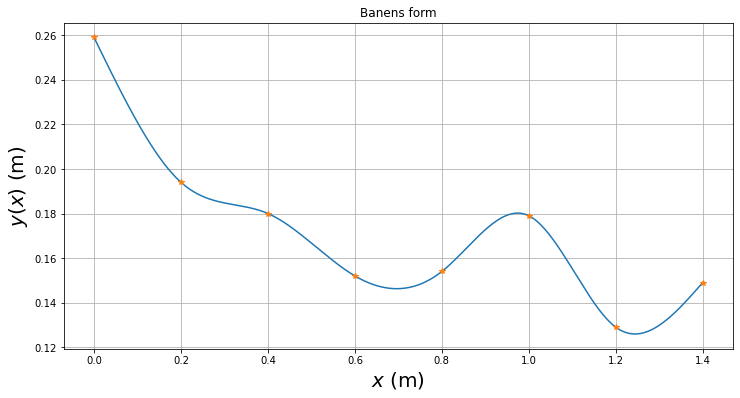

In [80]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.grid()
plt.show()

Denne koden kan nå utvides til å regne ut flere interessante størelser =) 

In [81]:
g = 9.81
c = 2/5
M = 0.031

v = np.sqrt((2*g*(y[0]-y))/(1+c))

k = d2y/((1+dy**2)**(3/2))

b = np.arctan(dy)

v_x = v*np.cos(b)

a_sen = v**2*k

N = M*(g*np.cos(b)+a_sen)

f = 2*M*g*np.sin(b)/7


real_t =0
time = np.zeros(len(v))

for i in range(1,len(v)):
    time[i] = real_t
    print(f"tid etter {i}-te bit: {real_t}")
    real_t += 2*dx/(v_x[i-1]+v_x[i])
    
    
    
    #må bytte x med dx. kun konstant fart i små intervaller



tid etter 1-te bit: 0
tid etter 2-te bit: 0.028769984982789865
tid etter 3-te bit: 0.04068691141536081
tid etter 4-te bit: 0.049831105447941136
tid etter 5-te bit: 0.05754003631401608
tid etter 6-te bit: 0.06433176272886831
tid etter 7-te bit: 0.07047197761298778
tid etter 8-te bit: 0.07611851540023691
tid etter 9-te bit: 0.0813742144703955
tid etter 10-te bit: 0.08631050702772314
tid etter 11-te bit: 0.09097940278075366
tid etter 12-te bit: 0.0954201651645136
tid etter 13-te bit: 0.09966329823086827
tid etter 14-te bit: 0.10373306048986333
tid etter 15-te bit: 0.107649120863457
tid etter 16-te bit: 0.11142768955950778
tid etter 17-te bit: 0.11508231406751672
tid etter 18-te bit: 0.11862445404873917
tid etter 19-te bit: 0.12206390585152474
tid etter 20-te bit: 0.12540912210264366
tid etter 21-te bit: 0.12866745643068342
tid etter 22-te bit: 0.13184535370322417
tid etter 23-te bit: 0.13494849990957417
tid etter 24-te bit: 0.13798194168317762
tid etter 25-te bit: 0.14095018265805148
tid 

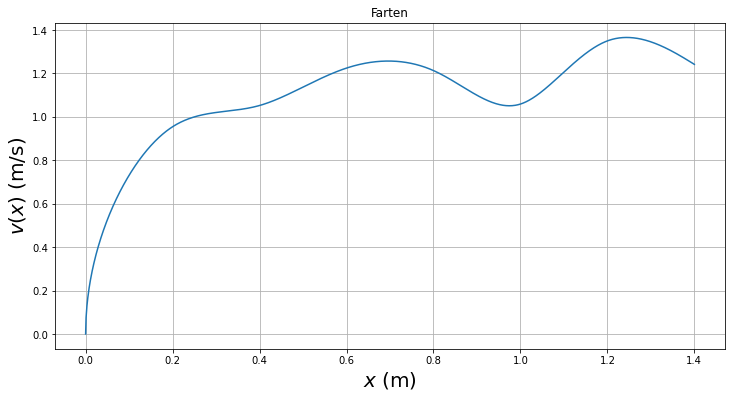

In [82]:
#Farten
baneform = plt.figure('v(x)',figsize=(12,6))
plt.plot(x,v)
plt.title('Farten')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v(x)$ (m/s)',fontsize=20)
plt.grid()
plt.show()

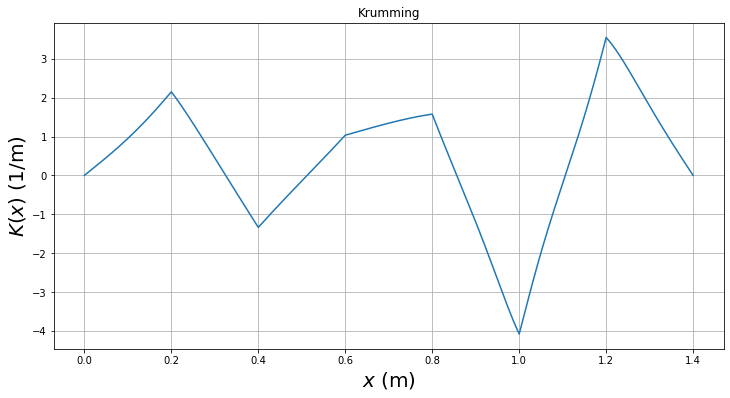

In [83]:
#krumming
baneform = plt.figure('t(x)',figsize=(12,6))
plt.plot(x,k)
plt.title('Krumming')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)$ (1/m)',fontsize=20)
plt.grid()
plt.show()

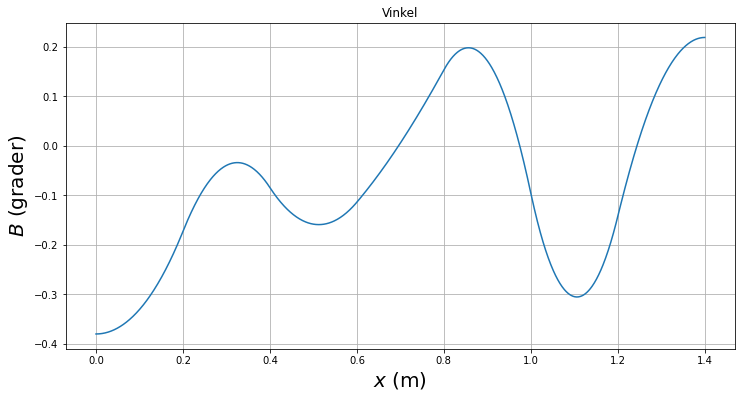

In [84]:
#Helningsvinkel
baneform = plt.figure('t(x)',figsize=(12,6))
plt.plot(x,b)
plt.title('Vinkel')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$B$ (grader)',fontsize=20)
plt.grid()
plt.show()

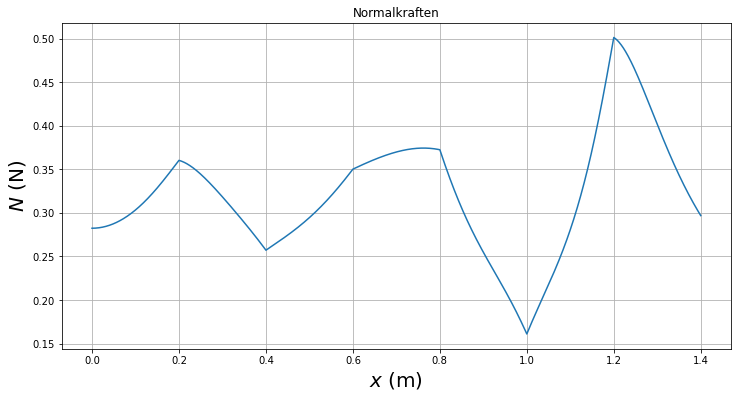

In [85]:
#Normalkraften
baneform = plt.figure('t(x)',figsize=(12,6))
plt.plot(x,N)
plt.title('Normalkraften')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$N$ (N)',fontsize=20)
plt.grid()
plt.show()

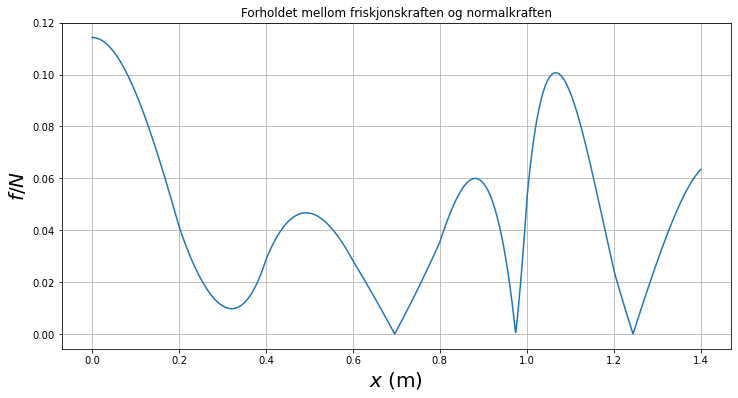

In [86]:
#Friksjonskonstanten
baneform = plt.figure('t(x)',figsize=(12,6))
plt.plot(x,np.abs(f/N))
plt.title('Forholdet mellom friskjonskraften og normalkraften')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$f/N$',fontsize=20)
plt.grid()
plt.show()

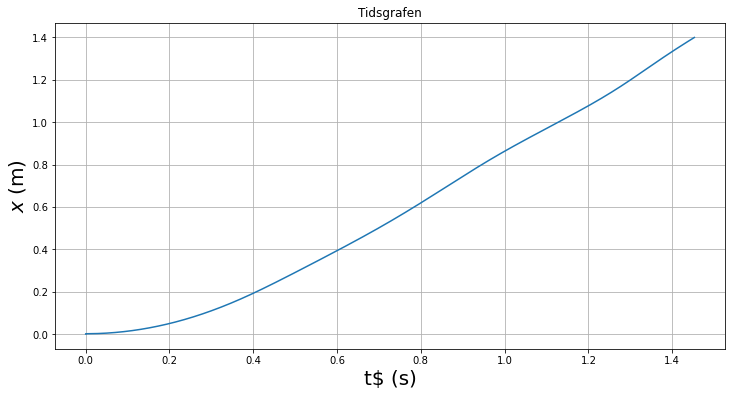

[0.000e+00 1.000e-03 2.000e-03 ... 1.398e+00 1.399e+00 1.400e+00]
[0.         0.         0.02876998 ... 1.45107205 1.45189498 1.45271874]


In [87]:
#Tiden
baneform = plt.figure('t(x)',figsize=(12,6))
plt.plot(time,x)
plt.title('Tidsgrafen')
plt.xlabel('t$ (s)',fontsize=20)
plt.ylabel('$x$ (m)' ,fontsize=20)
plt.grid()
plt.show()

print(x)
print(time)